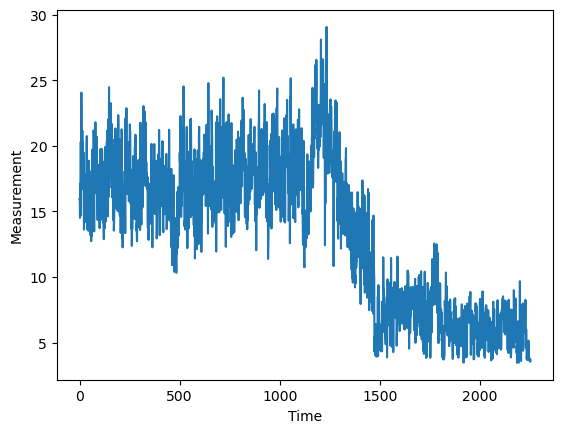

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('saltbr-GLU424-ARG1066.dat', sep=" ", header=None)

# Give the columns sensible names
data.columns = ['Time', 'Measurement']

# Use seaborn to create the plot
sns.lineplot(x='Time', y='Measurement', data=data)

# Show the plot
plt.show()


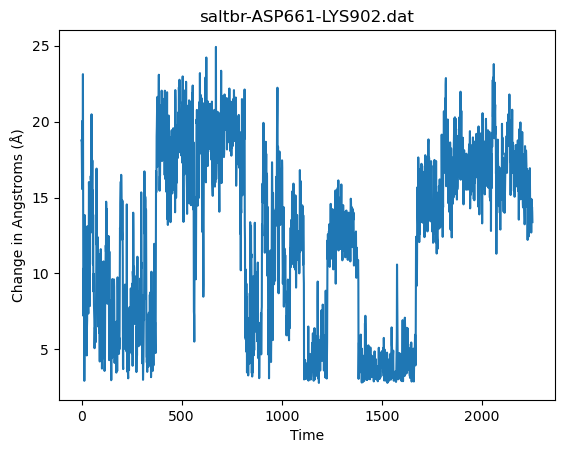

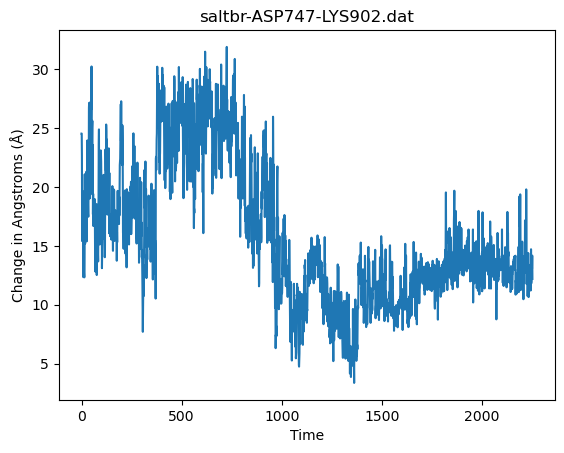

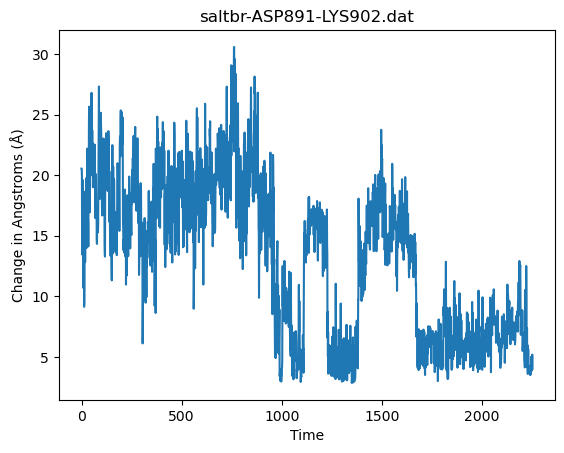

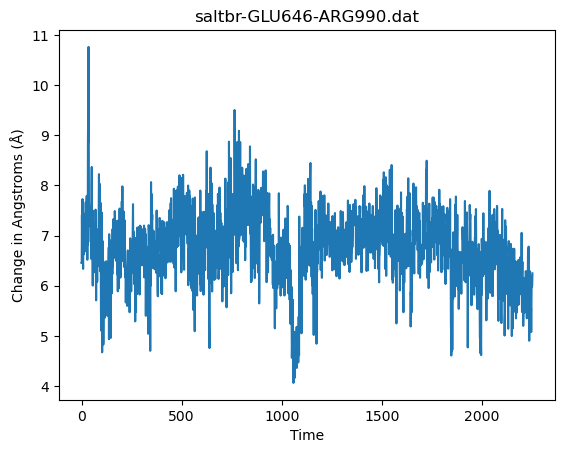

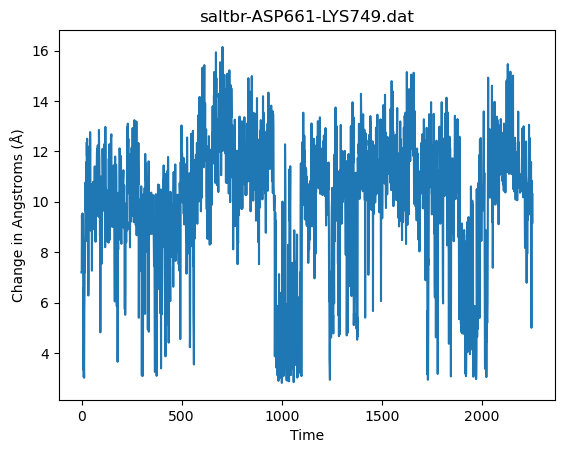

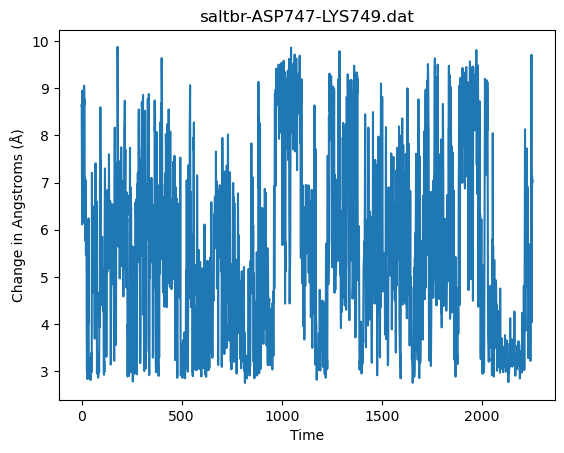

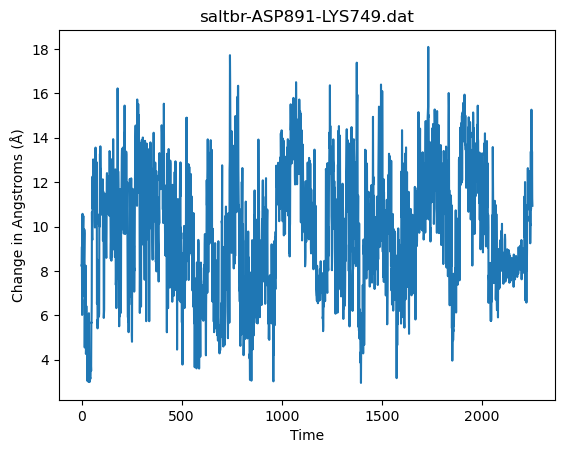

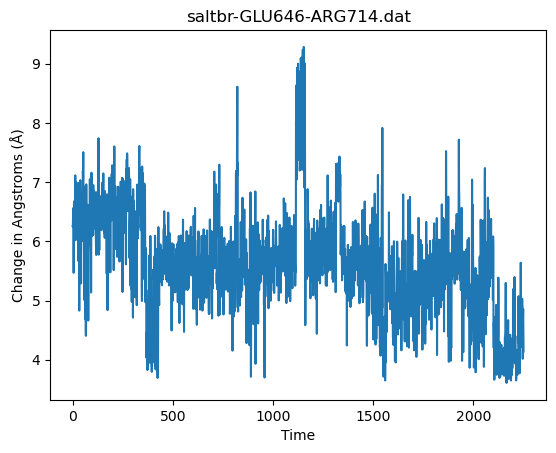

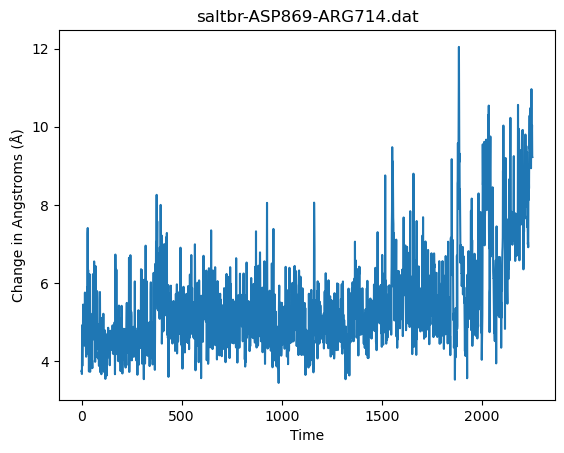

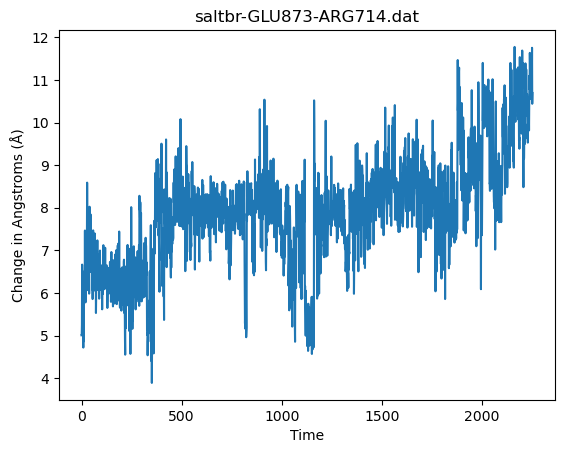

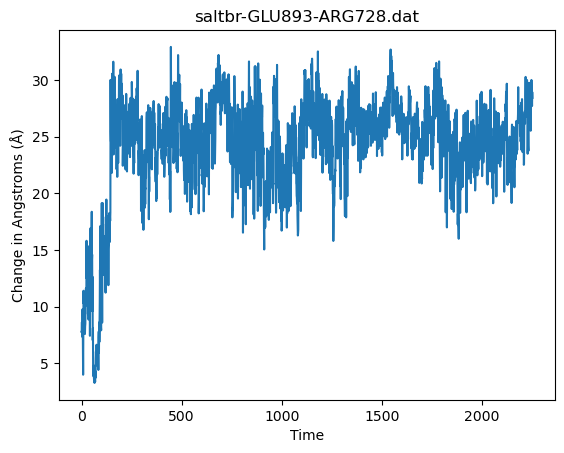

In [18]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of file names
files = [
    'saltbr-ASP661-LYS902.dat',
    'saltbr-ASP747-LYS902.dat',
    'saltbr-ASP891-LYS902.dat',
    'saltbr-GLU646-ARG990.dat',
    'saltbr-ASP661-LYS749.dat',
    'saltbr-ASP747-LYS749.dat',
    'saltbr-ASP891-LYS749.dat',
    'saltbr-GLU646-ARG714.dat',
    'saltbr-ASP869-ARG714.dat',
    'saltbr-GLU873-ARG714.dat',
    'saltbr-GLU893-ARG728.dat'
]

# Folder where the files are located
folder = 'resal'

# Iterate over the list of files
for file in files:
    # Construct the full file path
    file_path = os.path.join(folder, file)

    # Load the data
    data = pd.read_csv(file_path, sep=" ", header=None)

    # Give the columns sensible names
    data.columns = ['Time', 'Change in Angstroms (Å)']

    # Use seaborn to create the plot
    sns.lineplot(x='Time', y='Change in Angstroms (Å)', data=data)

    # Add a title
    plt.title(file)

    # Show the plot
    plt.show()


In [45]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator


In [109]:
# Update the font to 'Times New Roman'
plt.rcParams["font.family"] = "Times New Roman"

# Update the font size to 12
plt.rcParams.update({'font.size': 12})

def setup_plot(x_label, y_label, xmin=0, xmax=None, ymin=0, ymax=None):
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 8)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    ax.tick_params(labelsize=12)
    ax.set_xlabel(x_label, fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    if xmin is not None and xmax is not None:
        ax.set_xlim([xmin, xmax*1.05])  # xmin and xmax passed as a list
    if ymin is not None and ymax is not None:
        ax.set_ylim([ymin, ymax*1.15])  # ymin and ymax passed as a list

    ax.xaxis.set_major_locator(ticker.AutoLocator())
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_major_locator(ticker.AutoLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

    return fig, ax


File: saltbr-ASP161_chainX-ARG3339_chainX_H3.dat
Initial original value: 6.903166683397946
Final original value: 9.017393679583911
Initial smoothed value: 7.386623307900535
Final smoothed value: 8.740513498761299
------------------


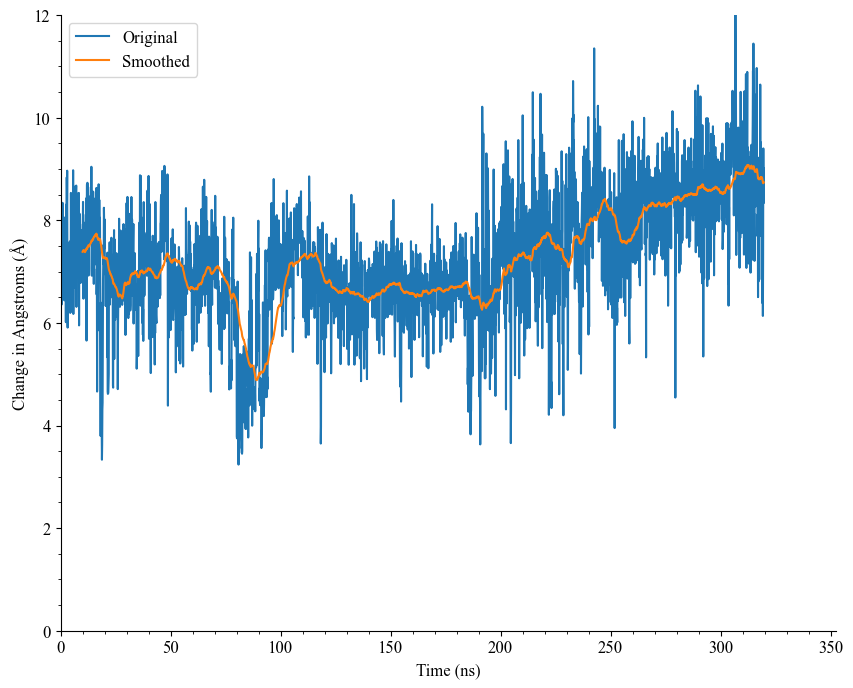

File: saltbr-ASP424_chainX-ARG3384_chainX_H6.dat
Initial original value: 14.771604653152744
Final original value: 12.665345873001051
Initial smoothed value: 17.242032761057484
Final smoothed value: 11.202079972317033
------------------


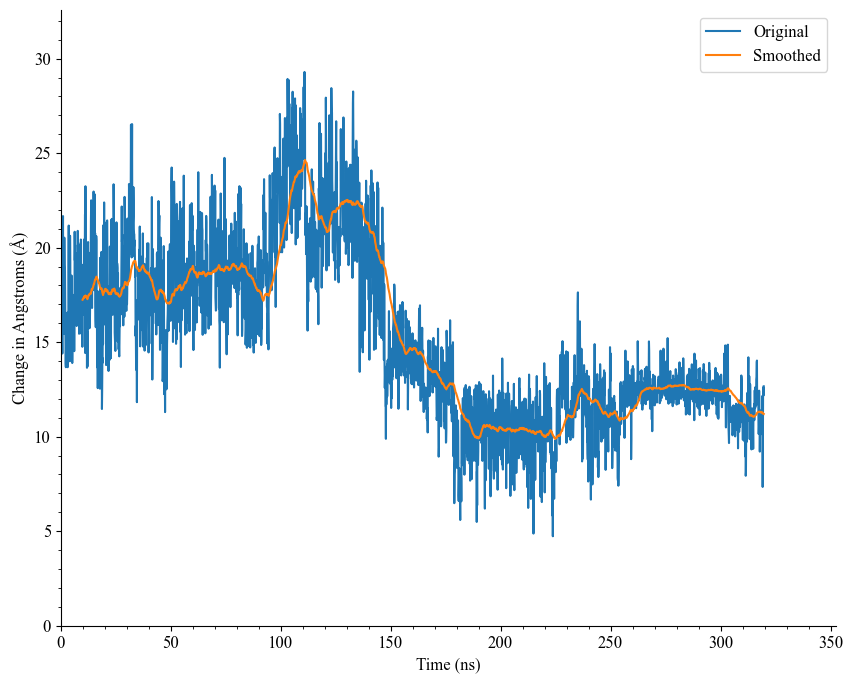

File: saltbr-GLU158_chainX-ARG3339_chainX_H3.dat
Initial original value: 14.679250266471696
Final original value: 10.769775918647582
Initial smoothed value: 14.251062586160245
Final smoothed value: 10.029964472597687
------------------


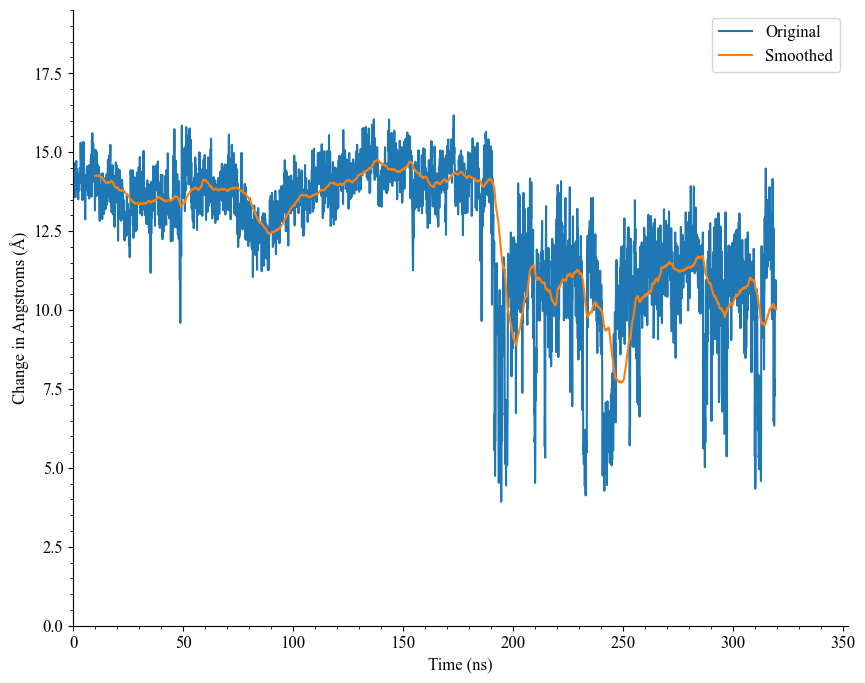

File: saltbr-GLU194_chainX-ARG3308_chainX_H1.dat
Initial original value: 6.453554543367459
Final original value: 6.254749876090439
Initial smoothed value: 7.105885444129017
Final smoothed value: 6.409018912542104
------------------


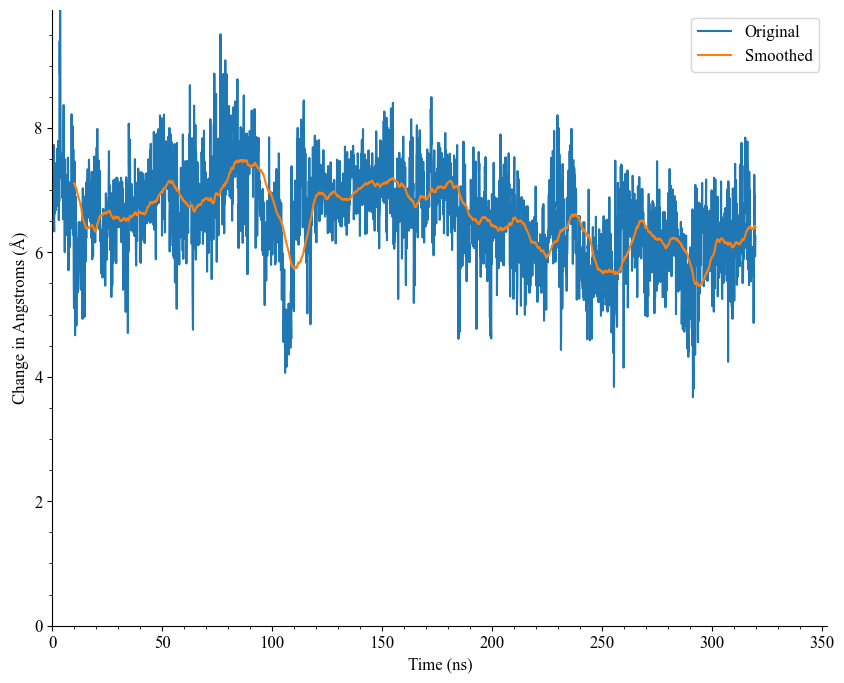

File: saltbr-GLU414_chainX-ARG3384_chainX_H6.dat
Initial original value: 5.060342098501587
Final original value: 16.990554935906616
Initial smoothed value: 9.812173606133074
Final smoothed value: 12.338838570837911
------------------


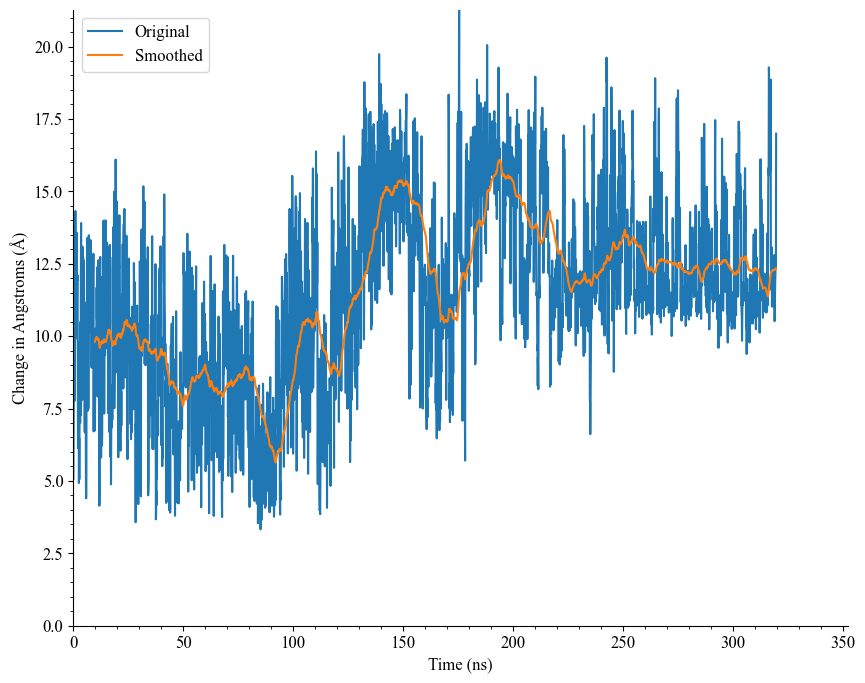

File: saltbr-GLU415_chainX-ARG3384_chainX_H6.dat
Initial original value: 12.23937455799341
Final original value: 16.125696232322632
Initial smoothed value: 15.12658653015828
Final smoothed value: 13.57187108463237
------------------


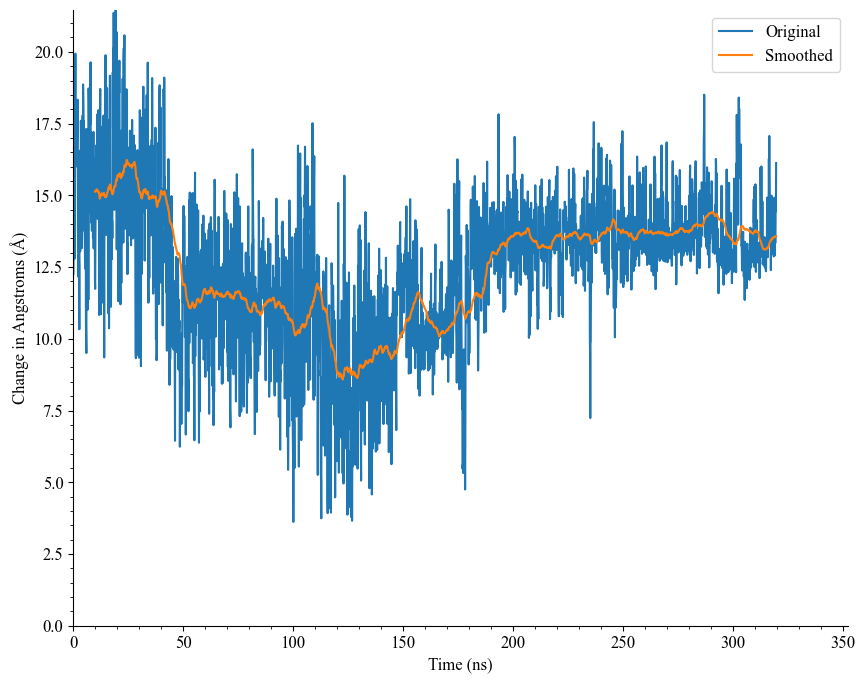

File: saltbr-GLU417_chainX-ARG3384_chainX_H6.dat
Initial original value: 6.534936804467701
Final original value: 18.904659734036805
Initial smoothed value: 10.832172541282066
Final smoothed value: 14.298688137592805
------------------


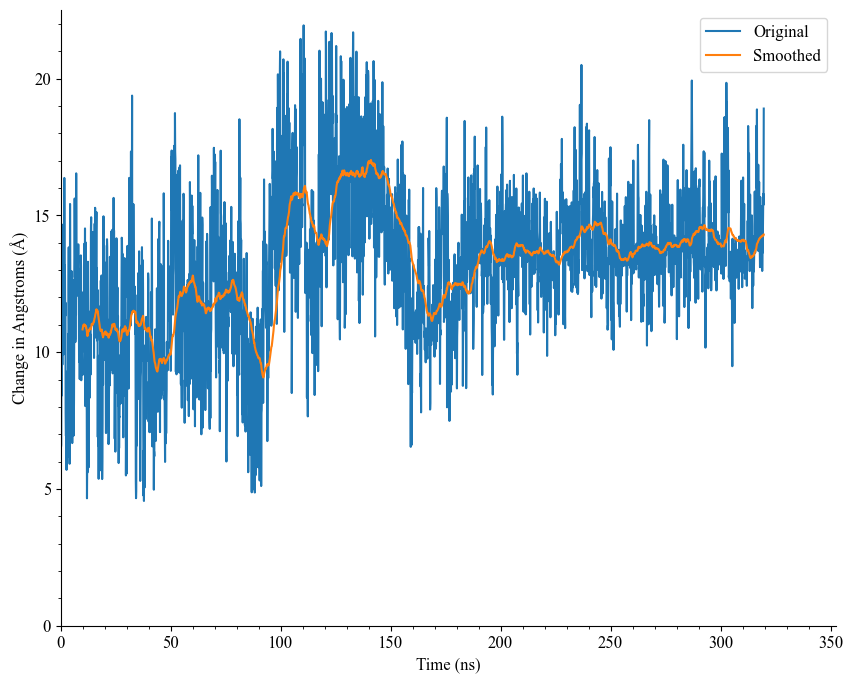

File: saltbr-GLU420_chainX-ARG3384_chainX_H6.dat
Initial original value: 10.509851689850064
Final original value: 12.329144099275464
Initial smoothed value: 10.824347333155167
Final smoothed value: 7.792115434798494
------------------


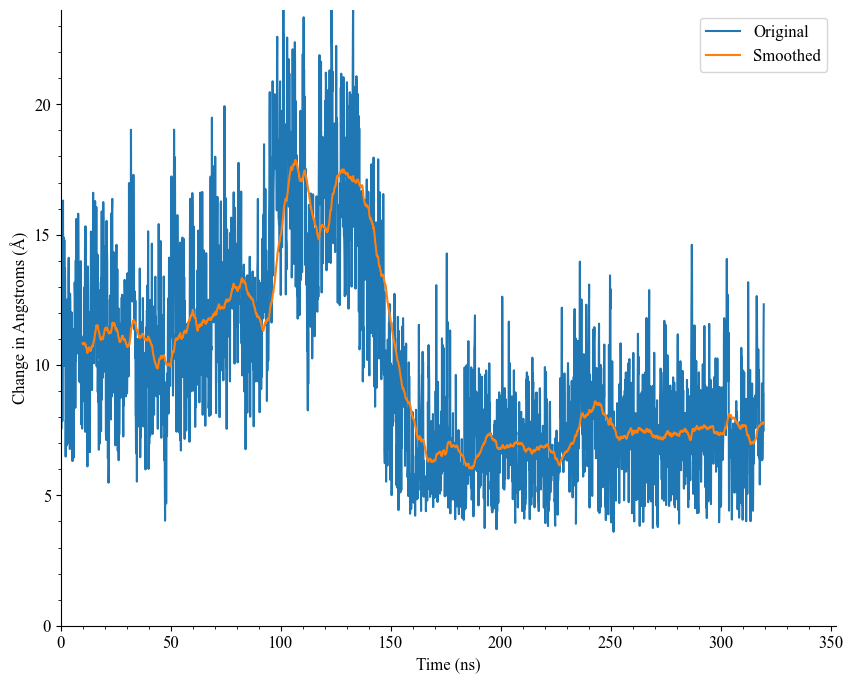

File: saltbr-GLU423_chainX-ARG3384_chainX_H6.dat
Initial original value: 15.94223666083764
Final original value: 4.293139192728482
Initial smoothed value: 17.040602579727462
Final smoothed value: 4.751786593478728
------------------


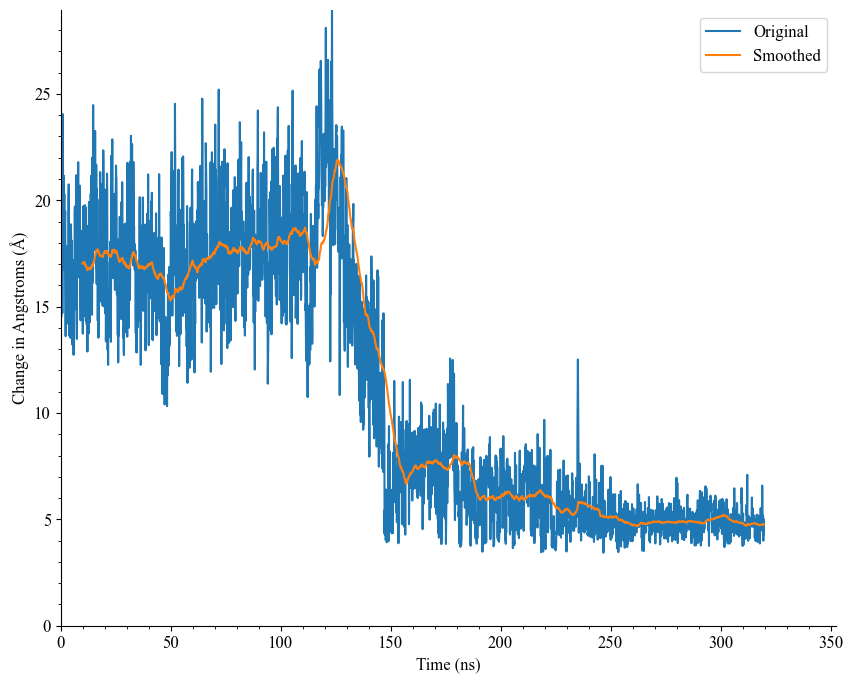

In [112]:
folder = 'target_sal'

# Iterate over the list of files
for file in files:
    # Construct the full file path
    file_path = os.path.join(folder, file)

    # Load the data
    data = pd.read_csv(file_path, sep=" ", header=None)

  # Give the columns sensible names
    data.columns = ['Time', 'Change in Angstroms (Å)']

    # Convert time from picoseconds to nanoseconds
    data['Time'] = data['Time'] / 10

    # Copy the original data
    original_data = data.copy()

    # Calculate the rolling average
    data['Change in Angstroms (Å)'] = data['Change in Angstroms (Å)'].rolling(window=100).mean()

    # Print initial and final values
    print(f"File: {file}")
    print(f"Initial original value: {original_data['Change in Angstroms (Å)'].iloc[0]}")
    print(f"Final original value: {original_data['Change in Angstroms (Å)'].iloc[-1]}")
    print(f"Initial smoothed value: {data['Change in Angstroms (Å)'].iloc[99]}")  # first non-NaN value
    print(f"Final smoothed value: {data['Change in Angstroms (Å)'].iloc[-1]}")
    print("------------------")

    # Use setup_plot function to create the plot
    xmin = 0  # set x-axis start to 0
    xmax = data['Time'].max() * 1.05  # set x-axis end to 5% more than the max time
    ymin = 0  # set y-axis start to 0
    ymax = data['Change in Angstroms (Å)'].max() * 1.15  # set y-axis end to 15% more than the max angstrom change

    fig, ax = setup_plot('Time (ns)', 'Change in Angstroms (Å)', xmin, xmax, ymin, ymax)

    # Plot the original data
    sns.lineplot(x='Time', y='Change in Angstroms (Å)', data=original_data, ax=ax, label='Original')

    # Plot the smoothed data
    sns.lineplot(x='Time', y='Change in Angstroms (Å)', data=data, ax=ax, label='Smoothed')

    # Add a title
    plt.savefig(os.path.join("Final Graphs", f'{os.path.splitext(file)[0]}.png'), dpi=300)
    # Show the plot
    plt.show()
